# Sign Glove

Ploting the Data we get from the Flex Sensors to visually see the difference between the signs

Import Libraries and connect to Google Drive

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# generate accesss to the drive (=data)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This code loads flexsensor data from a CSV file that contains the measurements for each finger in a single column. The data is split to create separate columns for each finger and then converted to numeric values. Rows with missing values are removed and then scaling factors are calculated to ensure that the data from all fingers have a similar starting value. These scaling factors are applied to each sensor's data to normalise the data and make it more suitable for comparison.

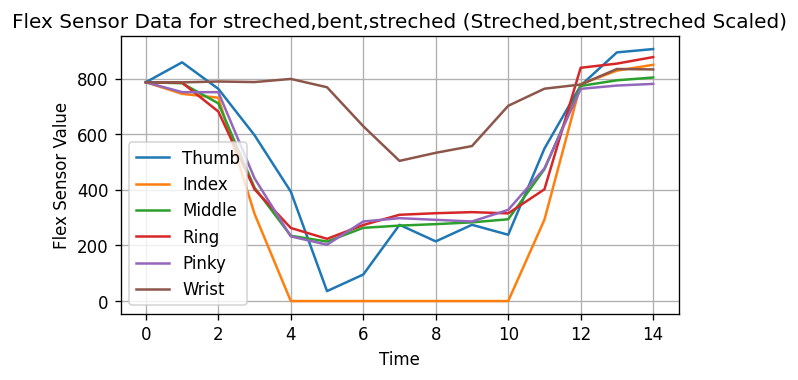

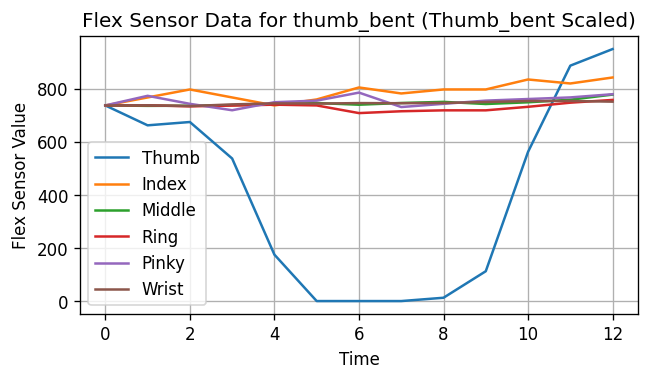

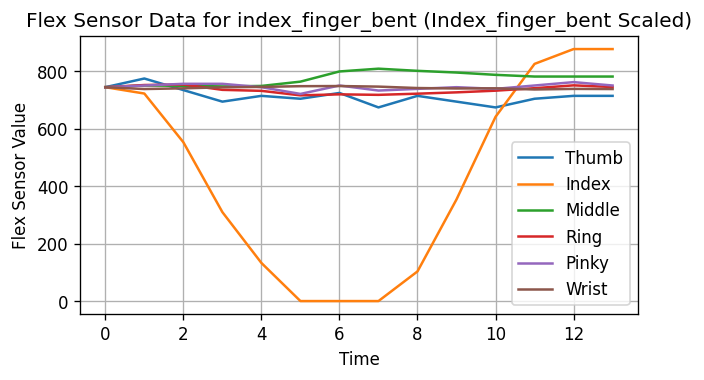

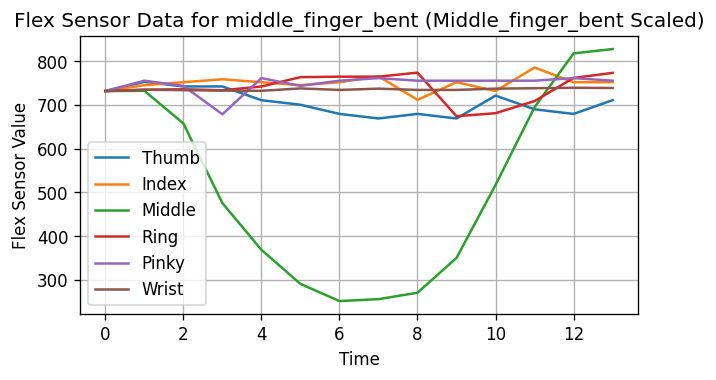

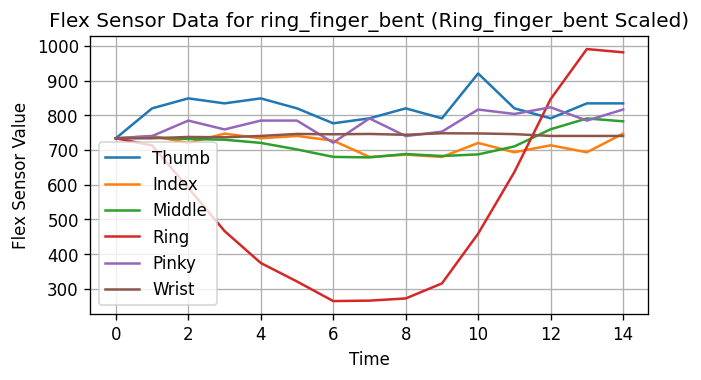

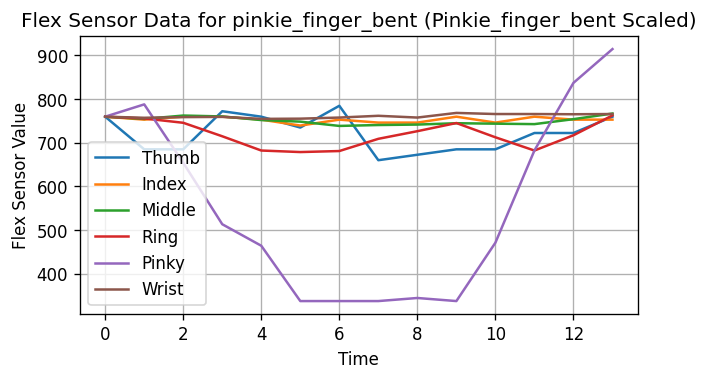

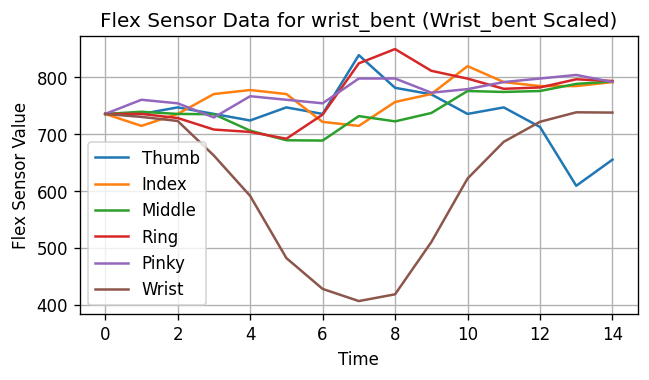

In [48]:
# Liste der Dateipfade
file_paths = ["/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/streched,bent,streched.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/thumb_bent.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/index_finger_bent.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/middle_finger_bent.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/ring_finger_bent.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/pinkie_finger_bent.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/wrist_bent.csv"]

# Prozessieren und plotten Sie die Daten für jede Datei
for file_path in file_paths:
    # Read the data
    df = pd.read_csv(file_path)

    # Split the single column into multiple columns
    df[['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']] = df['thumb;index;middle;ring;pinkie;wrist'].str.split(';', expand=True)

    # Convert sensor values to numeric, handle errors with coerce
    df[['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']] = df[['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']].apply(pd.to_numeric, errors='coerce')

    # Drop any rows with missing values
    df.dropna(inplace=True)

    # Calculate the mean of initial values for all sensors
    initial_mean = df[['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']].iloc[0].mean()

    # Calculate scaling factors for each sensor
    scaling_factors = initial_mean / df[['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']].iloc[0]

    # Apply scaling to each sensor's data
    for finger in ['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']:
        df[finger] *= scaling_factors[finger]

    # Plotting flex sensor data for each finger
    plt.figure(figsize=(4, 2))
    for finger in ['thumb', 'index', 'middle', 'ring', 'pinky', 'wrist']:
        plt.plot(df.index, df[finger], label=finger.capitalize())
    plt.xlabel('Time')
    plt.ylabel('Flex Sensor Value')
    plt.title(f'Flex Sensor Data for {file_path.split("/")[-1].split(".")[0]} ({file_path.split("/")[-1].split(".")[0].capitalize()} Scaled)')
    plt.legend()
    plt.grid(True)
    plt.show()
